#### To Fix:
- code should be uniform
- 'cols' should not be used as variables
- put comments and references if copied from somewhere




#### Notes:

- Preparation
o Look at 99s 888  (double check for other non-relevevant data)  (Sergey)
o BMI/100 (Sergey)
    
o Scale / Normalize / Standartize data? (research)  (Spring)
o One hot encoding ? (research)  (Spring)
    
- Need to choose appropriate features
o Correlation coefficient (13)
    
***
- Need to choose the best model for classification:
o Calc. cross validation score:
    o Select training : test sets 80:20
    o Select KFold validation (10 folds) on training set 
        o Logistic Regression (Camm)
        o SVM (resarch) (Sergey)
            
            
            
            
- We'll compile presentation based on analysis results


#### Rubric:
- Project presentation during Session 5 (Friday 2022-05-27)  
o 18 minutes:  15-min presentation, 3-min Q&A  
- Presentation - 15 points  
o Problem definition and data description (1 pt) 
    o Take it from the previous presentation
    o Goal/success criteria - 0.85 train/test data accuracy

o Data preparation (3 pts)  
    o Removed columns with less than 300k not null values ((-> 112 features left))
    o Drop na in the whole dataset
    o Performed EDA, found absolute correlations > 0.1 (largest was 0.24) (-> 25 features left)
    o Looked at remaining features, removed highly correlated (linearly dependent features)
        o Based on CDC's provided documentation on variables(features) (-> 12 features left)
    o Went feature by feature, looked at the question/responses, 
        o removed 'Refused' responses
        o removed outliers from BMI
        o Replaced NO=2 by 0s for Logistic Regression / SVM Models
        o Replaced such response codes as 8/88/888 by 0s
    o We had imbalanced data labels (270k NO / 42k YES)
        o Balanced dataset by removing part of NO responses: 42k:42k
    o Feature Transformation
        o One-hot encoding
        o Scaling
        o Normalization
        
o Analysis approaches (2 pts)  
     o Attempting 5 Classification Models:
         o Logistic Regression
         o Linear Support Vector Machines
         o Decision Tree
         o Gradient Boosted Tree Classifier
         o Random Forest Classifier
      o Split the dataset into Train/Test (0.8:0.2)
      o Applying K-Fold Cross Validation (K=10)
      o Striving to achieve accuracy rate closest the success criteria (0.85) by:
          o Hyperparameter Tuning: Grid search-based model selection (ParamGridBuilder())
          o Features engineering tuning (trial-and-error: one-hot encoding, responses modification, features selection modifications)       
o Analysis results (3 pts)
     o Model Selection:
          o Initially models selection was done by comparing accuracy rates
     o Our disease prediction problem requires specific evaluation approach:
          o We want to maximize the Recall metric, while a certain compromise can be made with accuracy/presision metrics
          o Evaluation of ROC graphs between models (we want higher TPR)
          o Put the table of of all models results
          o Based on the results, in our opinion, the GBTC won!!!
o Challenges and approaches to address challenges (2 pts)
    o General:
         o Selection out of 279 features (Feature Selection / Dimentionality Reduction)
         o Feature Transformation (which features required scaling/ one-hot encoding)
         o Some functionalities of Pandas/Scikit Learn/ Numpy is not available in PySpark
              o developing custom code/functions
         o Model Hyperparameter Fine-Tuning: time-constrains / lack of expertise
              o online research
              o consultation with experts
    o Specific: 
         o SAS dataset
         o Imbalanced dataset
               o balance by reducing the size of majority class (undersampling)
         o Dataset size reduced to 80k after balancing

         o Feature Engineering: the dataset features has not uniform response codes (example: 9 vs 99 vs 999 for 'Refuse to answer')
              o had to go feature by feature to make it uniform
         o Lack of Medical Domain Knowledge
              o use of common ML/DS techniques taught in the class
    
o Insights gained (2 pts)  
    o For this type of problems decision trees based models perform better
    o Feature Selection insights (TBD)
        
        
o Future work (1 pt)  
    o Increase accuracy by more precise feature selection / engineering
    o Discussions with domain experts
    o Evaluation of models with combined historical datasets
    o Models hyperparameters fine-tuning continuation
    o Attempt to find probabilities for the results
        
        
o All team members present (1 pt) 
    
    
- Code - 5 points  
o Code execution and completeness (3 pts)  
o Code organization and documentation (1 pt)  
o README to describe code organization and how to run code (1 pt)  
- Peer review of 2 other teams - 4 points  
o Ask at least 2 questions and provide feedback during Q&A (2 pts per team)  
- Team evaluation - 1 point  
o Complete evaluation form (1 pt)  


# DSE-230 Final Project
## Diabetes Risk Prediction from Personal Health Indicators
***
### Team 3
#### Chunxia Tong  
#### Camm Perera
#### Sergey Gurvich

***
## Table of Contents:

* [1. Project Description](#project_description)
    * [1.1 Project Setup](#)
    * [1.2 Success Criteria](#)
    * [1.3 Links](#)
    * [1.4 Setup](#)
* [2. EDA](#eda)
    * [2.1 ](#)
    * [2.2 ](#)
    * [2.3 ](#)
    * [2.4 ](#)
* [3. Data Preparation](#data_preparation)
    * [3.1 ](#)
    * [3.2 ](#)
    * [3.3 ](#)
    * [3.4 ](#)
* [4. Modeling](#modeling)
    * [4.1 Logistic Regression](#log_reg)
    * [4.2 Linear SVM](#lsvm)
    * [4.3 Decision Tree](#dtree)
    * [4.4 ](#)
* [5. Evaluation](#evaluation)
    * [5.1 ](#)
    * [5.2 ](#)
    * [5.3 ](#)
    * [5.4 ](#)
* [6. Conclusion](#conclusion)
    * [6.1 ](#)
    * [6.2 ](#)
    * [6.3 ](#)
    * [6.4 ](#)
* [7. Tear Down](#stop)
***

## 1. Project Description and Setup <a class="anchor" id="project_description"></a>

### 1.1 Problem Description
Diabetes.......
### 1.2 Success Criteria
Test error ....
### 1.3 Links
git: https://github.com/spring-camm-sergey/dse230  
dataset: https://www.cdc.gov/brfss/annual_data/annual_2020.html


### 1.4 Setup <a class="anchor" id="project_setup"></a>

#### 1.4.1 Imports <a class="anchor" id="imports"></a>


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pyspark
import numpy as np  # for histogram plot

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import FloatType

from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC, LogisticRegression, DecisionTreeClassifier, GBTClassifier, RandomForestClassifier
from pyspark.ml.feature import StandardScaler, Normalizer, OneHotEncoder, VectorAssembler, StringIndexer, VectorIndexer
from pyspark.ml.stat import Correlation
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#### 1.4.2 Start Spark Session <a class="anchor" id="start_spark_session"></a>

In [2]:
conf = pyspark.SparkConf().setAll([('spark.master', 'local[*]'),
                                   ('spark.app.name', 'Basic Setup')])
                                    # ('spark.memory.offHeap.enabled', True)
                                    # ('spark.memory.offHeap.size','8g'),
                                    # ('spark.executor.memory', '16g'), 
                                    # ('spark.driver.memory','16g')
                                  # ]
                                  # )
spark = SparkSession.builder.config(conf=conf).getOrCreate()
spark.sparkContext.setLogLevel('OFF')
spark.version

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-05-26 19:53:54,280 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'3.2.1'

#### 1.4.3 Read Data <a class="anchor" id="read_data"></a>

In [3]:
# main dataset
orig_df = spark.read.option("header", True).csv('hdfs:///BRFSS_2020_DATA_NAMES.csv', inferSchema=True)

## 2. EDA <a class="anchor" id="eda"></a>

### 2.1 Dataset Dimensions

In [4]:
orig_sdf  = orig_df
print(f"Number of samples: {orig_sdf.count()}")
print(f"Number of features: {len(orig_sdf.columns)}")

Number of samples: 401958
Number of features: 279


In [5]:
# orig_sdf.printSchema()

### 2.2 Missing values (for EDA Only)


#### To preserve non-sparse samples, we removed columns not meeting threshhold - must have at least 300k not NULLs:

In [6]:
def drop_null_columns(sdf, threshold=0):
    """
    Drops all columns which contain null values. 
    Leave columns, where count(not nulls) > threshhold.
    Note: Simulates pandas.DataFrame.dropna(axis=1, thresh=300000)
    
    :param Dataframe sdf: PySpark DataFrame to work with
    :param int threshold: min numbers of not nulls in column in order not to drop it
    :return: cleaned PySpark dataFrame
    """
    null_counts = sdf.select([count(when(
        col(c).isNull() | 
        col(c).contains('None') | 
        col(c).contains('NULL') | 
        col(c).contains('NA') | 
        (col(c)=='') | 
        (col(c)==99) | 
        isnan(c), 
        c)).alias(c) for c in sdf.columns]).collect()[0].asDict()
    
    to_drop = [k for k, v in null_counts.items() if v > sdf.count()-threshold]
    sdf = sdf.drop(*to_drop)
    return sdf



data_sdf = drop_null_columns(orig_sdf, threshold=300000)


print(f'Original number of samples: {orig_sdf.count()}, , number of columns: {len(orig_sdf.columns)}')
print(f'Cleaned number of samples: {data_sdf.count()}, , number of columns: {len(data_sdf.columns)}')

Original number of samples: 401958, , number of columns: 279
Cleaned number of samples: 401958, , number of columns: 112


#### Remove NULL samples:

In [7]:
cleaned_sdf = data_sdf.na.drop()
print(f'Cleaned number of samples: {cleaned_sdf.count()}, and number of features: {len(cleaned_sdf.columns)}')

Cleaned number of samples: 326959, and number of features: 112


***
#### IF NO EDA IS NEEDED, WE CAN GO STRAIGHT TO THE DATA PREPARATION SECTION FROM HERE: [Data Preparation](#data_preparation)
***

### 2.3 Summary Statistics

In [7]:
# # Note: this code is likely to throw memory heap Java error, so it is temporarily commented out.
# this is to skip execution of a cell:
%%script false --no-raise-error

summary_sdf = cleaned_sdf.summary()
summary_sdf.count(), len(summary_sdf.columns)

In [8]:
# this is to skip execution of a cell:
%%script false --no-raise-error

#--- Summary Stats Transpose Code ---
def transpose_df(df, columns, pivot_col):
    """
    The function transposes the summary stats dataframe.
    Source: https://nikhil-suthar-bigdata.medium.com/how-to-transpose-spark-dataframe-fa82c079a6b
  
    :param DataFrame df - summary stats dataframe
    :param list columns: - columns list
    :param str pivot_col - pivot column name
    :return: None
    """
    columns_value = list(map(lambda x: str("'") + str(x) + str("',")  + str(x), columns))
    stack_cols = ','.join(x for x in columns_value)
    df_1 = df.selectExpr(pivot_col, "stack(" + str(len(columns)) + "," + stack_cols + ")")\
           .select(pivot_col, "col0", "col1")
    final_df = df_1.groupBy(col("col0")).pivot(pivot_col).agg(concat_ws("", collect_list(col("col1"))))\
                 .withColumnRenamed("col0", pivot_col)
    return final_df

summary_trans_sdf = transpose_df(summary_sdf, summary_sdf.columns[1:], 'summary')

summary_trans_sdf.show(115)

### 2.4 Visualisations

#### HEATMAP - Feature Correlation

In [9]:
corr_cols = [x for x in cleaned_sdf.columns]
corr_list = []

for col in range(len(corr_cols)):
    corr_list.append({"feature": corr_cols[col] , "correlation": cleaned_sdf.stat.corr('DIABETE4',corr_cols[col])})
    
corr_sdf = spark.createDataFrame(corr_list)
corr_abs_sdf = corr_sdf.withColumn('corr_absolute',abs(corr_sdf.correlation))
corr_filtered_sdf = corr_abs_sdf.filter(corr_abs_sdf.corr_absolute > 0.1)
# corr_filtered_sdf.show(30)
corr_filtered_sdf[['feature', 'corr_absolute']].sort(corr_filtered_sdf.corr_absolute.desc()).show(30)

+--------+-------------------+
| feature|      corr_absolute|
+--------+-------------------+
|DIABETE4|                1.0|
| GENHLTH|0.24340324217549966|
|  _AGE_G|0.18566104340993733|
|   _BMI5|0.18564263474273196|
|  _AGE80|0.18480478597113167|
|_AGEG5YR|0.17934966268845237|
|_BMI5CAT| 0.1678549836616008|
|  _MICHD|  0.167778486875065|
| EMPLOY1|0.16395298848008066|
| _RFHLTH| 0.1583593772232029|
|   WTKG3|0.15146909226095578|
|DIFFWALK|0.14561578202781555|
|HAVARTH4| 0.1442233091718822|
|_DRDXAR2|0.14422330917188217|
|_HCVU651|0.13845058824181003|
|_AGE65YR|0.13344457583732638|
| _RFBMI5|0.12951355502292466|
|_DRNKDRV| 0.1280952455367749|
| ALCDAY5|0.12657147533039714|
|RMVTETH4|0.12589976279024256|
|EXERANY2| 0.1152107075515753|
|CVDINFR4|0.11420407874965834|
|_TOTINDA|0.10979460176323247|
|CHECKUP1|0.10747923192999645|
|PNEUVAC4|0.10083168617775363|
+--------+-------------------+



In [10]:
# Remove unrelated features for concise heatmap visual:
features_to_remove = (
'CHECKUP1', #'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP'
'CVDINFR4', #'EVER DIAGNOSED WITH HEART ATTACK'
'RMVTETH4', #'NUMBER OF PERMANENT TEETH REMOVED',
'PNEUVAC4', #'PNEUMONIA SHOT EVER', 
'_RFHLTH',  #'ADULTS WITH GOOD OR BETTER HEALTH',
'_TOTINDA', #'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE',
'_AGE65YR', #'REPORTED AGE IN TWo AGE GROUPS CALCULATED VARIABLE',
'_AGE80',   #'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
'_AGE_G',   #'IMPUTED AGE IN SIX GROUPS',
'_RFBMI5',  #'OVERWEIGHT OR OBESE CALCULATED VARIABLE',
'_DRNKDRV'  #'DRINKING AND DRIVING'
)

# Get correlation feature names 
corr_features = [row[0] for row in corr_filtered_sdf.select('Feature').collect()]

corr_features_sdf = cleaned_sdf.select(corr_features)
corr_features_reduced_sdf = corr_features_sdf.drop(*features_to_remove)
corr_features_reduced_sdf.printSchema()

root
 |-- GENHLTH: integer (nullable = true)
 |-- EXERANY2: integer (nullable = true)
 |-- HAVARTH4: integer (nullable = true)
 |-- DIABETE4: integer (nullable = true)
 |-- EMPLOY1: integer (nullable = true)
 |-- DIFFWALK: integer (nullable = true)
 |-- ALCDAY5: integer (nullable = true)
 |-- _HCVU651: integer (nullable = true)
 |-- _MICHD: integer (nullable = true)
 |-- _DRDXAR2: integer (nullable = true)
 |-- _AGEG5YR: integer (nullable = true)
 |-- WTKG3: integer (nullable = true)
 |-- _BMI5: integer (nullable = true)
 |-- _BMI5CAT: integer (nullable = true)



In [11]:
#  Build correlation matrix
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=corr_features_reduced_sdf.columns, 
                            outputCol=vector_col)
heatmap_vector = assembler.transform(corr_features_reduced_sdf).select(vector_col)
matrix = Correlation.corr(heatmap_vector, vector_col)

matrix = Correlation.corr(heatmap_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
heatmap_sdf = spark.createDataFrame(corrmatrix, corr_features_reduced_sdf.columns, corr_features_reduced_sdf.columns)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


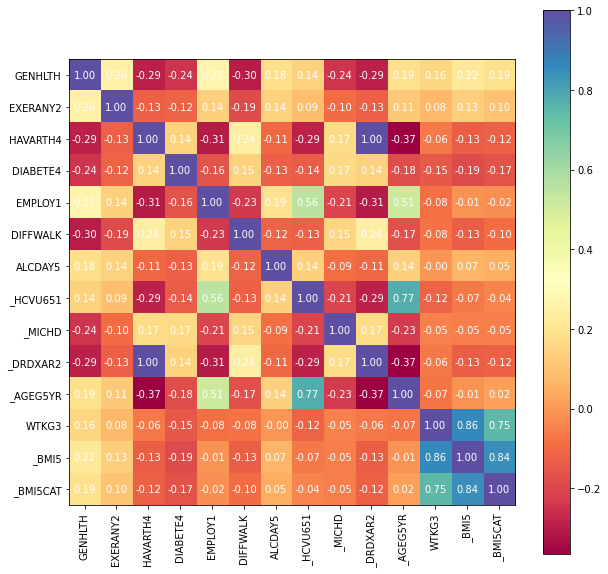

In [12]:
# Plot correaltion heatmap
plt.imshow(corrmatrix, cmap='Spectral')
plt.colorbar()
plt.xticks(range(len(heatmap_sdf.columns)), heatmap_sdf.columns, rotation=90)
plt.yticks(range(len(heatmap_sdf.columns)), heatmap_sdf.columns)
plt.gcf().set_size_inches(10,10)

labels = np.array(heatmap_sdf.collect())

for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        plt.text(x, y, '{:.2f}' .format(labels[y, x]), ha='center', va='center', color='white')

#### PIECHART - Sex of Respondent

In [13]:
# Exclude age group 14='No response'
age_not_grp14_sdf = cleaned_sdf.filter(cleaned_sdf['_AGEG5YR'] < 14)
pie_sdf = age_not_grp14_sdf.select('SEXVAR')
# pie_sdf.count(), len(pie_sdf.columns)

In [14]:
# Get group counts for repondent sex
pie_group_sdf = pie_sdf.groupBy('SEXVAR').count().orderBy('count', ascending=True)
pie_group_renamed_sdf = pie_group_sdf.withColumnRenamed('count', 'pop_count')
pie_group_count = pie_group_renamed_sdf.collect()

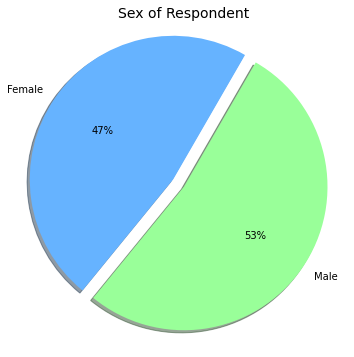

In [15]:
# Pie data prep
pie_data = []

for i in range(len(pie_group_count)):
    pie_data.append(pie_group_count[i].pop_count)

#define color palette to use
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']

# define data labels
labels = ['Female', 'Male']

# Create a pieplot
plt.figure(figsize=(6, 6))
plt.pie(pie_data, labels=labels, colors=colors, autopct='%.00f%%' ,radius=1.1 ,shadow=True, explode=[0.1,0], startangle=60)
plt.title("Sex of Respondent", fontdict={'fontsize':14})
plt.show()

#### HISTOGRAM - Computed Body Mass Index

In [16]:
histo_sdf = cleaned_sdf.filter(cleaned_sdf._BMI5 < 6000)
histo_bmi_vals = histo_sdf.select('_BMI5').collect()

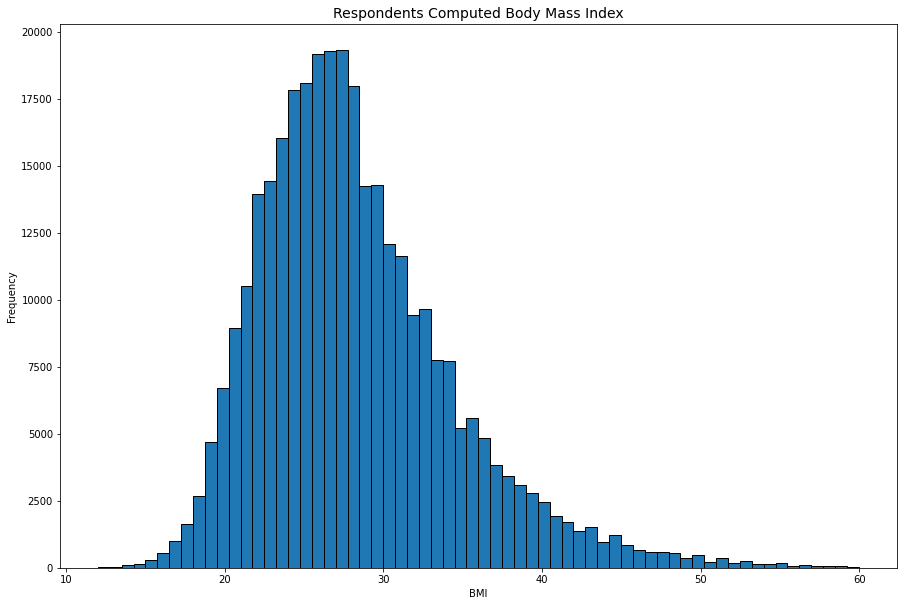

In [17]:
# Histo data prep
hsito_data = []

for i in range(len(histo_bmi_vals)):
    hsito_data.append(histo_bmi_vals[i]._BMI5/100)

hsito_data[:5]

# Plot histogram
counts, bins = np.histogram(hsito_data, bins=64)
plt.figure(figsize=(15, 10))
plt.hist(bins[:-1], bins, weights=counts, ec='black')
plt.title('Respondents Computed Body Mass Index', fontdict={'fontsize':14})
plt.ylabel('Frequency')
plt.xlabel('BMI')
plt.show()

## 3. Data Preparation <a class="anchor" id="data_preparation"></a>

### 3.1 Features Removing
#### NO ADDITIONAL ACTION NEEDED HERE. While EDA, we've alredy removed the features with too many NULLs.

### 3.2 Dataset Cleaning
#### NO ADDITIONAL ACTION NEEDED HERE. While EDA, we've alreay dropped all remaining rows with NULLs.

In [8]:
# leave cleaned_sdf as backup, we can re-run many times faster
cleaned_df = cleaned_sdf

print(f'Cleaned number of rows: {cleaned_df.count()}, , number of columns: {len(cleaned_df.columns)}')

Cleaned number of rows: 326959, , number of columns: 112


In [9]:
# cleaned_df.show(1)

### 3.3 Feature Selection

- We picked fetures according to the absolute correlation coefficients' results >0.1 in the EDA section. Let's apply it here:

In [10]:
# Candidates from correlation coef. >= 0.1:

# +--------+-------------------+
# | feature|      corr_absolute|
# +--------+-------------------+
# | GENHLTH|0.24589367600251408|
# |  _AGE_G|0.19092127239726459|
# |  _AGE80|0.19072694276261376|
# |_AGEG5YR|0.18723669342527285|
# |   _BMI5|0.18616837031030695|
# | EMPLOY1|0.16976771483478573|
# |  _MICHD|0.16944105523216146|
# |_BMI5CAT|0.16832290901401584|
# | _RFHLTH|0.16507734173422267|
# |DIFFWALK|0.15201125568861884|
# |   WTKG3|0.15188968238715578|
# |_DRDXAR2|0.14709958030515652|
# |HAVARTH4|0.14709958030515652|
# |_HCVU651|0.14388852597614002|
# |_AGE65YR|0.14235057094120832|
# |_DRNKDRV|0.13059650197464265|
# | ALCDAY5|0.13001893982345375|
# | _RFBMI5|0.12933584562653766|
# |RMVTETH4|0.12854739562343914|
# |EXERANY2|0.11950726230964258|
# |CVDINFR4| 0.1161998615943308|
# |_TOTINDA|0.11388422824979928|
# |CHECKUP1|0.11007528748766457|
# |PNEUVAC4|0.10258756884001767|
# |_PHYS14D|0.10131009704045844|
# +--------+-------------------+

cols = [
    'GENHLTH',
    '_AGE_G',
    '_BMI5',
    '_AGE80',
    '_AGEG5YR',
    '_BMI5CAT',
    '_MICHD',
    'EMPLOY1',
    '_RFHLTH',
    'WTKG3',
    'DIFFWALK',
    '_DRDXAR2',
    'HAVARTH4',
    '_HCVU651',
    '_AGE65YR',
    '_RFBMI5',
    '_DRNKDRV',
    'ALCDAY5',
    'RMVTETH4',
    'EXERANY2',
    'CVDINFR4',
    '_TOTINDA',
    'CHECKUP1',
    'PNEUVAC4',
    'DIABETE4',
]

# leave only selected columns
df_selected_features = cleaned_df[cols]

- Take care of the label column

In [11]:
# rename diabetes column to 'label'
df_selected_features = df_selected_features.withColumnRenamed('DIABETE4', 'label')

# # LEAVE ONLY YES AND NO ANSWERS FOR DIABETES QUESTION
# Label Response Map:
# 1 Yes
# 2 Yes, but female told only during pregnancy
# 3 No
# 4 No, prediabetes or borderline diabetes
# 7 Don’t know / Not sure
# 9 Refused

df_selected_features = df_selected_features.filter((df_selected_features['label']==1)|(df_selected_features['label']==3))  # leave only yes and no

# replace 3s by 0s
df_selected_features = df_selected_features.withColumn("label", when(df_selected_features["label"] == 3, 0).otherwise(df_selected_features["label"]))

# df_selected_features = df_selected_features.na.drop()
df_selected_features.groupby('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    1| 42359|
|    0|274713|
+-----+------+



- Print questions and possible answers count

In [12]:
# we'll to feature fransformation in the separate DF
df_features_transformation = df_selected_features

# csv of questionaire with possible answers
questions_df = spark.read.option("header", True).csv('hdfs:///brfss_features_list.csv', inferSchema=True)

# mapping labels-actual questions
labels_map = spark.read.option("header", True).csv('hdfs:///features_map.csv', inferSchema=True)

def print_feature_details(columns, n, print_counts=True):
    """
    The function prints info about the feature: question, code, possible responses, counts.
    
    :param list columns: - list of features we work with
    :param int n - index of the feature we want to print info
    :param bool print_counts - True if we wat to print the counts of different responses
    :return: None
    """
    print(columns[n])
    print(labels_map.filter(labels_map['var']==columns[n])[['question']].first())
    question = questions_df.filter((questions_df['VariableName']==columns[n]) & (questions_df['year']==2020))[['Question']].first()
    responses = questions_df.filter((questions_df['VariableName']==columns[n]) & (questions_df['year']==2020))[['Responses']].first()
    print(question)
    print(responses)
    
    if print_counts:
        df_features_transformation.groupBy(columns[n]).count().show()
    else:
        print('-'*20)

In [13]:
for n in range(len(cols)-1):
    print_feature_details(cols, n, print_counts=False)

GENHLTH
Row(question='GENERAL HEALTH')
Row(Question='Would you say that in general your health is:')
Row(Responses='1=Excellent 2=Very good 3=Good 4=Fair 5=Poor 7=Don’t know/Not Sure 9=Refused')
--------------------
_AGE_G
Row(question='IMPUTED AGE IN SIX GROUPS')
None
None
--------------------
_BMI5
Row(question='COMPUTED BODY MASS INDEX')
None
None
--------------------
_AGE80
Row(question='IMPUTED AGE VALUE COLLAPSED ABOVE 80')
None
None
--------------------
_AGEG5YR
Row(question='REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE')
None
None
--------------------
_BMI5CAT
Row(question='COMPUTED BODY MASS INDEX CATEGORIES')
None
None
--------------------
_MICHD
Row(question='RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)')
None
None
--------------------
EMPLOY1
Row(question='EMPLOYMENT STATUS')
Row(Question='Are you currently…?')
Row(Responses='1=Employed for wages 2=Self-employed 3=Out of work for 1 year or more 4=Out o

**After analyzing the variables and removing some highly correlated variables (some variables are calculated from others and are linearly dependent), here is the list that we left with:**
- 'GENHLTH' - GENERAL HEALTH
- '_AGE80' - IMPUTED AGE VALUE COLLAPSED ABOVE 80
- '_BMI5' - COMPUTED BODY MASS INDEX
- '_MICHD' - RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)
- 'EMPLOY1' - EMPLOYMENT STATUS
- 'DIFFWALK' - DIFFICULTY WALKING OR CLIMBING STAIRS
- '_DRDXAR2' - RESPONDENTS DIAGNOSED WITH ARTHRITIS
- 'ALCDAY5' - DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE
- 'RMVTETH4' - NUMBER OF PERMANENT TEETH REMOVED
- 'EXERANY2' - EXERCISE IN PAST 30 DAYS
- 'CHECKUP1' - LENGTH OF TIME SINCE LAST ROUTINE CHECKUP
- 'PNEUVAC4' - PNEUMONIA SHOT EVER
- 'DIABETE4 (label)' - (EVER TOLD) YOU HAD DIABETES

In [14]:
cols_final = [
    'GENHLTH',
    '_AGE80',
    '_BMI5',
    '_MICHD',
    'EMPLOY1',
    'DIFFWALK',
    '_DRDXAR2',
    'ALCDAY5',
    'RMVTETH4',
    'EXERANY2',
    'CHECKUP1',
    'PNEUVAC4',
    'label'
]

df_features_transformation = df_features_transformation[cols_final]

#### Let's go through features one-by-one

In [15]:
n=0
print_feature_details(cols_final, n)

GENHLTH
Row(question='GENERAL HEALTH')
Row(Question='Would you say that in general your health is:')
Row(Responses='1=Excellent 2=Very good 3=Good 4=Fair 5=Poor 7=Don’t know/Not Sure 9=Refused')


+-------+------+
|GENHLTH| count|
+-------+------+
|      1| 65113|
|      3| 92038|
|      5| 11933|
|      9|   160|
|      4| 34981|
|      7|   407|
|      2|112440|
+-------+------+



**Transformation actions:**  
_1. Remove answers 9_  
_2. Apply one-hot encoding to this feature_

In [16]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['GENHLTH']!=9)

In [17]:
n+=1
print_feature_details(cols_final, n)

_AGE80
Row(question='IMPUTED AGE VALUE COLLAPSED ABOVE 80')
None
None


+------+-----+
|_AGE80|count|
+------+-----+
|    31| 3241|
|    65| 7524|
|    53| 4857|
|    78| 4036|
|    34| 3652|
|    28| 3415|
|    76| 4456|
|    27| 3235|
|    26| 3056|
|    44| 3636|
|    22| 3092|
|    47| 4094|
|    52| 5104|
|    40| 4625|
|    20| 2816|
|    57| 5700|
|    54| 4868|
|    48| 4400|
|    19| 2831|
|    64| 6626|
+------+-----+
only showing top 20 rows



**Transformation actions:**  
_Try one hot encoding_

In [18]:
n+=1
print_feature_details(cols_final, n)

_BMI5
Row(question='COMPUTED BODY MASS INDEX')
None
None


+-----+-----+
|_BMI5|count|
+-----+-----+
| 3175|  758|
| 3918|    4|
| 1829|  174|
| 2366|   10|
| 2866|   81|
| 4101|   58|
| 4519|  121|
| 3749|   64|
| 1645|   22|
| 1959|   15|
| 2122|   64|
| 3794|   15|
| 2142|    7|
| 1591|    2|
| 2659|    1|
| 5300|    8|
| 1580|    4|
| 4818|    5|
| 2387|  126|
| 3475|  368|
+-----+-----+
only showing top 20 rows



**Transformation actions:**  
_We'll just apply scaling_  
_Look for outliers_

In [19]:
# remove outliers
df_features_transformation = df_features_transformation.filter(df_features_transformation['_BMI5']<6000)

In [20]:
n+=1
print_feature_details(cols_final, n)

_MICHD
Row(question='RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)')
None
None


+------+------+
|_MICHD| count|
+------+------+
|     1| 27941|
|     2|288525|
+------+------+



**Transformation actions:**  
_1. Replace 2 by 0_

In [21]:
df_features_transformation = df_features_transformation.withColumn("_MICHD", when(df_features_transformation["_MICHD"] == 2, 0).otherwise(df_features_transformation["_MICHD"]))

# df_features_transformation.groupBy(df_features_transformation['_MICHD']).count().show()

In [22]:
n+=1
print_feature_details(cols_final, n)

EMPLOY1
Row(question='EMPLOYMENT STATUS')
Row(Question='Are you currently…?')
Row(Responses='1=Employed for wages 2=Self-employed 3=Out of work for 1 year or more 4=Out of work for less than 1 year 5=A homemaker 6=A student 7=Retired 8=Unable to work 9=Refused')


+-------+------+
|EMPLOY1| count|
+-------+------+
|      1|132701|
|      6|  8820|
|      3|  5321|
|      5| 12042|
|      9|  1930|
|      4| 12578|
|      8| 19575|
|      7| 95351|
|      2| 28148|
+-------+------+



**Transformation actions:**   
_1. Remove 9_

In [23]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['EMPLOY1']!=9)

In [24]:
n+=1
print_feature_details(cols_final, n)

DIFFWALK
Row(question='DIFFICULTY WALKING OR CLIMBING STAIRS')
Row(Question='Do you have serious difficulty walking or climbing stairs?')
Row(Responses='1=Yes 2=No 7=Don’t know/Not Sure 9=Refused')


+--------+------+
|DIFFWALK| count|
+--------+------+
|       1| 45128|
|       9|   112|
|       7|   709|
|       2|268587|
+--------+------+



**Transformation actions:**   
_1. Remove 9_

In [25]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['DIFFWALK']!=9)

In [26]:
n+=1
print_feature_details(cols_final, n)

_DRDXAR2
Row(question='RESPONDENTS DIAGNOSED WITH ARTHRITIS')
None
None


+--------+------+
|_DRDXAR2| count|
+--------+------+
|       1| 99442|
|       2|214982|
+--------+------+



**Transformation actions:**  
_1. Replace 2 by 0_

In [27]:
df_features_transformation = df_features_transformation.withColumn("_DRDXAR2", when(df_features_transformation["_DRDXAR2"] == 2, 0).otherwise(df_features_transformation["_DRDXAR2"]))
# df_features_transformation.groupBy(df_features_transformation['_DRDXAR2']).count().show()

In [28]:
n+=1
print_feature_details(cols_final, n)

ALCDAY5
Row(question='DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE')
Row(Question='During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?')
Row(Responses='101-107=Days per week 201-230=Days in past 30 days 888=No drinks in past 30 days 777=Don’t know/Not sure 999=Refused')


+-------+-----+
|ALCDAY5|count|
+-------+-----+
|    211|   51|
|    101|13408|
|    210| 7054|
|    103| 7988|
|    223|   78|
|    222|  150|
|    209|  216|
|    230|13733|
|    225| 2747|
|    224|  155|
|    206| 3242|
|    777| 2532|
|    212| 1558|
|    218|  213|
|    205| 8656|
|    227|  232|
|    207| 2298|
|    202|17826|
|    107| 5981|
|    217|   90|
+-------+-----+
only showing top 20 rows



**Transformation actions:**   
_1. Remove 999_  
_2. Replace 888 by 0_

In [29]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['ALCDAY5']!=999)
df_features_transformation = df_features_transformation.withColumn("ALCDAY5", when(df_features_transformation["ALCDAY5"] == 888, 0).otherwise(df_features_transformation["ALCDAY5"]))
# print_feature_details(cols_final, n)

In [30]:
n+=1
print_feature_details(cols_final, n)

RMVTETH4
Row(question='NUMBER OF PERMANENT TEETH REMOVED')
Row(Question='Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?')
Row(Responses='1=1 to 5 2=6 or more, but not all 3=All 8=None 7=Don’t know/Not sure 9=Refused')


+--------+------+
|RMVTETH4| count|
+--------+------+
|       1| 90164|
|       3| 19432|
|       9|   364|
|       8|164706|
|       7|  5821|
|       2| 32998|
+--------+------+



**Transformation actions:**   
_1. Remove 9_  
_2. Replace 8 by 0_

In [31]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['RMVTETH4']!=9)
df_features_transformation = df_features_transformation.withColumn("RMVTETH4", when(df_features_transformation["RMVTETH4"] == 8, 0).otherwise(df_features_transformation["RMVTETH4"]))
# print_feature_details(cols_final, n)

In [32]:
n+=1
print_feature_details(cols_final, n)

EXERANY2
Row(question='EXERCISE IN PAST 30 DAYS')
Row(Question='During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?')
Row(Responses='1=Yes 2=No 7=Don’t know/Not Sure 9=Refused')


+--------+------+
|EXERANY2| count|
+--------+------+
|       1|242555|
|       9|    87|
|       7|   302|
|       2| 70177|
+--------+------+



**Transformation actions:**   
_1. Remove 9_ 

In [33]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['EXERANY2']!=9)

In [34]:
n+=1
print_feature_details(cols_final, n)

CHECKUP1
Row(question='LENGTH OF TIME SINCE LAST ROUTINE CHECKUP')
Row(Question='About how long has it been since you last visited a doctor for a routine checkup?')
Row(Responses='1=Within past year (anytime less than 12 months ago) 2=Within past 2 years (1 year but less than 2 years ago) 3=Within past 5 years (2 years but less than 5 years ago) 4=5 or more years ago 7=Don’t know/Not sure 8=Never 9=Refused')


+--------+------+
|CHECKUP1| count|
+--------+------+
|       1|242338|
|       3| 16221|
|       9|   228|
|       4| 14400|
|       8|  1421|
|       7|  2925|
|       2| 35501|
+--------+------+



**Transformation actions:**   
_1. Remove 9_  
_2. Replace 8 by 0_

In [35]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['CHECKUP1']!=9)
df_features_transformation = df_features_transformation.withColumn("CHECKUP1", when(df_features_transformation["CHECKUP1"] == 8, 0).otherwise(df_features_transformation["CHECKUP1"]))
# print_feature_details(cols_final, n)

In [36]:
n+=1
print_feature_details(cols_final, n)

PNEUVAC4
Row(question='PNEUMONIA SHOT EVER')
Row(Question='Have you ever had a pneumonia shot also known as a pneumococcal vaccine?')
Row(Responses='1=Yes 2=No 7=Don’t know/Not Sure 9=Refused')


+--------+------+
|PNEUVAC4| count|
+--------+------+
|       1|118534|
|       9|   103|
|       7| 25760|
|       2|168409|
+--------+------+



**Transformation actions:**   
_1. Remove 9_  

In [37]:
df_features_transformation = df_features_transformation.filter(df_features_transformation['PNEUVAC4']!=9)

In [38]:
df_features_transformation.groupby('label').count().show()
# df_features_transformation
temp = df_features_transformation.sampleBy('label', fractions={1: 1, 0: 0.1541}, seed=42)
temp.count()
temp.groupby('label').count().show()
df_features_transformation = temp

+-----+------+
|label| count|
+-----+------+
|    1| 41786|
|    0|270917|
+-----+------+



+-----+-----+
|label|count|
+-----+-----+
|    1|41786|
|    0|41769|
+-----+-----+



In [39]:
print('Final number of rows:',df_features_transformation.count())
print('Final number of columns:',len(df_features_transformation.columns))

Final number of rows: 83555
Final number of columns: 13


### 3.4 Feature Transformation
Scaling  
Aggregation  
Discretization  
One-hot encoding  
Dimensionality reduction  

In [40]:
# do backup for using with models, that don't require one-hot encoding and scaling
df_features_transformation_backup = df_features_transformation

#### One-hot encoding

In [41]:
# df_features_transformation = df_features_transformation_backup

# columns to transform
one_hot_cols_inp = ['GENHLTH', 'EMPLOY1', 'DIFFWALK', 'RMVTETH4', 'EXERANY2', 'CHECKUP1', 'PNEUVAC4']
# transformed colums will have '_OH' suffix in the name
one_hot_cols_outp = [x+'_OH' for x in one_hot_cols_inp]

# do the transformation
encoder = OneHotEncoder(
    inputCols=one_hot_cols_inp,  
    outputCols=one_hot_cols_outp
)
model = encoder.fit(df_features_transformation)
df_features_transformation = model.transform(df_features_transformation)

# drop original columns
df_features_transformation = df_features_transformation.drop(*one_hot_cols_inp)

df_features_transformation.show(1)

+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|_AGE80|_BMI5|_MICHD|_DRDXAR2|ALCDAY5|label|   GENHLTH_OH|   EMPLOY1_OH|  DIFFWALK_OH|  RMVTETH4_OH|  EXERANY2_OH|  CHECKUP1_OH|  PNEUVAC4_OH|
+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|    56| 1660|     0|       1|      0|    1|(7,[2],[1.0])|(8,[4],[1.0])|(7,[2],[1.0])|(7,[2],[1.0])|(7,[1],[1.0])|(7,[4],[1.0])|(7,[2],[1.0])|
+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
only showing top 1 row



#### Test/Training Data Splitting / Scaling / normalizing

In [42]:
# assemble all features in vector
col_feature_names = list(df_features_transformation.columns)
col_feature_names.remove('label')
vecAssembler = VectorAssembler(inputCols = col_feature_names, outputCol="features_unscaled")
df_features_transformation_unscaled = vecAssembler.transform(df_features_transformation)

# Generalization: split to test and train dataframes
train, test = df_features_transformation_unscaled.randomSplit([0.8, 0.2], seed=42)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

# scale data
standardScaler = StandardScaler(inputCol='features_unscaled', outputCol='features_scaled', withMean=True, withStd=True)
model = standardScaler.fit(train)
scaled_train = model.transform(train)
scaled_test= model.transform(test)

# normalize data
normalizer = Normalizer(p=2.0, inputCol='features_scaled', outputCol='features')
scaled_train = normalizer.transform(scaled_train)
scaled_test= normalizer.transform(scaled_test)

scaled_train.show(1)

Training Dataset Count: 67034


Test Dataset Count: 16521


+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-----------+-------------+-------------+-----------+--------------------+--------------------+--------------------+
|_AGE80|_BMI5|_MICHD|_DRDXAR2|ALCDAY5|label|   GENHLTH_OH|   EMPLOY1_OH|  DIFFWALK_OH|RMVTETH4_OH|  EXERANY2_OH|  CHECKUP1_OH|PNEUVAC4_OH|   features_unscaled|     features_scaled|            features|
+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-----------+-------------+-------------+-----------+--------------------+--------------------+--------------------+
|    18| 1481|     0|       0|      0|    0|(7,[4],[1.0])|(8,[6],[1.0])|(7,[2],[1.0])|  (7,[],[])|(7,[2],[1.0])|(7,[1],[1.0])|  (7,[],[])|(55,[0,1,9,18,22,...|[-2.4766451356534...|[-0.2697300683538...|
+------+-----+------+--------+-------+-----+-------------+-------------+-------------+-----------+-------------+-------------+-----------+--------------------+--------------------+------------

#### Data Transformation / Splitting for Tree Based Models

In [43]:
# make backup of data for many cycles of running
df_features_transformation_backup1 = df_features_transformation_backup
data = df_features_transformation_backup1

# assemble all features in vector
col_feature_names = list(data.columns)
col_feature_names.remove('label')
vec_assembler = VectorAssembler(inputCols = col_feature_names, outputCol="features")
data = vec_assembler.transform(data)

# to recognize categorical features
feature_indexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=10)
data = feature_indexer.fit(data).transform(data)

# drop features columns
data = data.drop(*col_feature_names, 'features')

# Split the data
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=42)

## 4. Modeling <a class="anchor" id="modeling"></a>

- The function for models evaluation

In [44]:
def evaluate(model, predictions_df, label='', model_name=''):
    """
    The function calculates the evaluation metrics for the models.
    
    :param Model Object model: - model object after fitting the data
    :param DataFrame predictions_df - DataFrame with label and predicted values
    :param str label - the name of column with labels
    :param str model_name - name of the model for priting the title
    :return: None
    """
    #  replace 0s with 2, to get correct confusion matrix
    preds_and_labels = predictions_df.select(['prediction',label])
    preds_and_labels = preds_and_labels.withColumn("prediction",when(preds_and_labels.prediction == 0,2).otherwise(1))
    preds_and_labels = preds_and_labels.withColumn(label,when(preds_and_labels[label] == 0,2).otherwise(1))

    # cast to float
    preds_and_labels = preds_and_labels.select(['prediction',label]).withColumn(label, pyspark.sql.functions.col(label).cast(FloatType())).orderBy('prediction')
    preds_and_labels = preds_and_labels.select(['prediction',label]).withColumn('prediction', pyspark.sql.functions.col('prediction').cast(FloatType())).orderBy('prediction')

    pred_and_labels_rdd = preds_and_labels.rdd.map(tuple)
    
    metrics = MulticlassMetrics(pred_and_labels_rdd)
    metrics.confusionMatrix().toArray()
    
    print(f"Evaluation of {model_name}")
    print("accuracy:",metrics.accuracy)
    print("test error:",(1 - metrics.accuracy))
    print("precision:",metrics.precision(2))
    print("recall:",metrics.recall(2))
    print("\n confusionMatrix:\n",metrics.confusionMatrix().toArray(),'\n')


    # print("truePositiveRate:",metrics.truePositiveRate(1.0))
    # print("falsePositiveRate:",metrics.falsePositiveRate(1.0))
    # print("trueNegativeRate:",metrics.truePositiveRate(0.0))
    # print("falseNegativeRate:",metrics.falsePositiveRate(0.0))


    print("fMeasure:" ,metrics.fMeasure(2.0, 1.0))
    # print("weightedFalsePositiveRate:" ,metrics.weightedFalsePositiveRate)
    # print("weightedPrecision:" ,metrics.weightedPrecision)
    # print("weightedRecall:" ,metrics.weightedRecall)
    # print("weightedFMeasure:" ,metrics.weightedFMeasure(1.0))

### 4.1 Classification: Logistic Regression  <a class="anchor" id="log_reg"></a>
#### Tune Decision Tree Model:
- Fit model to train data
- Use KFold Cross Validation K=10
- Iterate through different combinations of hyperparameters to find the best metric

In [44]:
%%script false --no-raise-error

%%time

lr_model = LogisticRegression(featuresCol ='features',labelCol='label') 

# Sequence stages
pipeline = Pipeline(stages=[lr_model])

# Hyper parameter tuning
lr_param_grid = ParamGridBuilder()\
            .addGrid(lr_model.elasticNetParam,[0.0, 0.5, 1.0])\
            .addGrid(lr_model.fitIntercept,[False, True])\
            .addGrid(lr_model.maxIter,[10, 30, 50, 1000])\
            .addGrid(lr_model.family, ['binomial']) \
            .addGrid(lr_model.regParam, [0.0001, 0.001, 0.1, 1.0, 2.0]) \
            .build()

# Cross validation
lr_cross_val = CrossValidator(estimator = pipeline,
                         estimatorParamMaps = lr_param_grid,
                         evaluator = BinaryClassificationEvaluator(),
                         numFolds = 10)

lr_fit_model = lr_cross_val.fit(scaled_train)

# Best model params:
best_params_idx = np.argmax(lr_fit_model.avgMetrics)
print(f"{lr_param_grid[best_params_idx]} \nAVG Metric: {lr_fit_model.avgMetrics[best_params_idx]}\n")

**NOTE: THIS IS SAVED OUTPUT. RE-RUNNING THE CELL CAN TAKE HOURS:**

{Param(parent='LogisticRegression_b52edbd3bc0f', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_b52edbd3bc0f', name='fitIntercept', doc='whether to fit an intercept term.'): False, Param(parent='LogisticRegression_b52edbd3bc0f', name='maxIter', doc='max number of iterations (>= 0).'): 30, Param(parent='LogisticRegression_b52edbd3bc0f', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'binomial', Param(parent='LogisticRegression_b52edbd3bc0f', name='regParam', doc='regularization parameter (>= 0).'): 0.0001} 
AVG Metric: 0.8267837084585531

CPU times: user 26 s, sys: 15.3 s, total: 41.4 s
Wall time: 45min 47s

#### Evaluate the model with unseen data and best hyperparameters combination

In [46]:
# Cross validation
best_lr_model = LogisticRegression(featuresCol ='features'
                              ,labelCol='label',maxIter=30, regParam=0.0001, family= 'binomial'
                              ,fitIntercept=False , elasticNetParam=1.0).fit(scaled_train)

best_lr_preds_train = best_lr_model.transform(scaled_train)
best_lr_preds_test = best_lr_model.transform(scaled_test)

evaluate(best_lr_model, best_lr_preds_train, 'label', 'Logistic Regression Train Data')
evaluate(best_lr_model, best_lr_preds_test, 'label', 'Logistic Regression Test Data')

Evaluation of Logistic Regression Train Data
accuracy: 0.7505892532147865
test error: 0.24941074678521347
precision: 0.7746986777557584
recall: 0.7090692833779364

 confusionMatrix:
 [[26469.  6935.]
 [ 9784. 23846.]] 

fMeasure: 0.7404325348154819


Evaluation of Logistic Regression Test Data
accuracy: 0.752678409297258
test error: 0.24732159070274196
precision: 0.7715395953369959
recall: 0.7074579186632265

 confusionMatrix:
 [[6677. 1705.]
 [2381. 5758.]] 

fMeasure: 0.7381104986540187


### 4.2 Classification: Linear SVM  <a class="anchor" id="lsvm"></a>
#### Tune Linear SVM  Model:
- Fit model to train data
- Use KFold Cross Validation K=10
- Iterate through different combinations of hyperparameters to find the best metric

In [71]:
%%script false --no-raise-error


%%time
lsvc_model = LinearSVC(featuresCol ='features',labelCol='label')

# Sequence stages
pipeline = Pipeline(stages=[lsvc_model])

# Hyper parameter tuning
lsvc_param_grid = ParamGridBuilder()\
            .addGrid(lsvc_model.threshold,[0.0,0.1, 0.2])\
            .addGrid(lsvc_model.aggregationDepth, [2,4,6])\
            .addGrid(lsvc_model.tol,[0.001, 0.1, 1.0])\
            .addGrid(lsvc_model.regParam, [0.0001, 0.001, 0.1, 1.0, 10.0]) \
            .addGrid(lsvc_model.fitIntercept,[False, True])\
            .addGrid(lsvc_model.maxIter,[100, 1000, 10000])\
            .build()

# Cross validation
lsvc_cross_val = CrossValidator(estimator = pipeline,
                         estimatorParamMaps = lsvc_param_grid,
                         evaluator = BinaryClassificationEvaluator(),
                         numFolds = 10)

lsvc_fit_model = lsvc_cross_val.fit(scaled_train)

# Best model params:
lsvc_best_params_idx = np.argmax(lsvc_fit_model.avgMetrics)
print(f"{lsvc_param_grid[lsvc_best_params_idx]} \nAVG Metric: {lsvc_fit_model.avgMetrics[lsvc_best_params_idx]}\n")

**NOTE: THIS IS SAVED OUTPUT. RE-RUNNING THE CELL CAN TAKE HOURS:**

{Param(parent='LinearSVC_58ed1f58e665', name='threshold', doc='The threshold in binary classification applied to the linear model prediction.  This threshold can be any real number, where Inf will make all predictions 0.0 and -Inf will make all predictions 1.0.'): 0.0, Param(parent='LinearSVC_58ed1f58e665', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 6, Param(parent='LinearSVC_58ed1f58e665', name='tol', doc='the convergence tolerance for iterative algorithms (>= 0).'): 0.001, Param(parent='LinearSVC_58ed1f58e665', name='regParam', doc='regularization parameter (>= 0).'): 0.0001, Param(parent='LinearSVC_58ed1f58e665', name='fitIntercept', doc='whether to fit an intercept term.'): False, Param(parent='LinearSVC_58ed1f58e665', name='maxIter', doc='max number of iterations (>= 0).'): 1000} 
AVG Metric: 0.8259948979482298

CPU times: user 2min 18s, sys: 1min 33s, total: 3min 52s
Wall time: 2h 11s

#### Test with unseen data and best hyperparameters combination

In [47]:
best_lsvc_model = LinearSVC(regParam=0.0001, threshold=0, aggregationDepth=6, tol=0.001,
                           fitIntercept=False, maxIter=1000).fit(scaled_train)

best_lsvc_predictions_train = best_lsvc_model.transform(scaled_train)
best_lsvc_predictions_test = best_lsvc_model.transform(scaled_test)

evaluate(best_lsvc_model, best_lsvc_predictions_train, 'label', 'Linear SVM Train Data')
evaluate(best_lsvc_model, best_lsvc_predictions_test, 'label', 'Linear SVM Test Data')

Evaluation of Linear SVM Train Data
accuracy: 0.7503654861711967
test error: 0.2496345138288033
precision: 0.7752329445494234
recall: 0.7075527802557241

 confusionMatrix:
 [[26505.  6899.]
 [ 9835. 23795.]] 

fMeasure: 0.7398482681425285


Evaluation of Linear SVM Test Data
accuracy: 0.7520125900369227
test error: 0.24798740996307733
precision: 0.7716397849462365
recall: 0.7053692099766556

 confusionMatrix:
 [[6683. 1699.]
 [2398. 5741.]] 

fMeasure: 0.7370177803453366


### 4.3 Classification: Decision Tree  <a class="anchor" id="dtree"></a>

#### Tune Decision Tree Model:
- Fit model to train data
- Use KFold Cross Validation K=10
- Iterate through different combinations of hyperparameters to find the best metric

In [70]:
%%script false --no-raise-error

%%time
# base model
dt_model = DecisionTreeClassifier(labelCol="label", featuresCol="indexedFeatures")

# Sequence stages
# pipeline = Pipeline(stages=[dt])

'''
class pyspark.ml.classification.DecisionTreeClassifier(*, featuresCol='features', labelCol='label', predictionCol='prediction', probabilityCol='probability', 
rawPredictionCol='rawPrediction', maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, 
checkpointInterval=10, impurity='gini', seed=None, weightCol=None, leafCol='', minWeightFractionPerNode=0.0)[source]
'''

# create combinations of hyperparameters
dt_param_grid = ParamGridBuilder()\
            .addGrid(dt_model.maxBins,[8, 16, 32, 64])\
            .addGrid(dt_model.minInstancesPerNode,[10, 100, 200, 500])\
            .build()

# cross validation
dt_cross_val = CrossValidator(estimator = dt_model,
                         estimatorParamMaps = dt_param_grid,
                         evaluator = BinaryClassificationEvaluator(),
                         # evaluator = MulticlassClassificationEvaluator(),
                         numFolds = 10)

# run the model selection
cv_model = dt_cross_val.fit(train_data)

# Best model params:
best_params_idx = np.argmax(cv_model.avgMetrics)
print(f"{dt_param_grid[best_params_idx]} \nAVG Metric: {cv_model.avgMetrics[best_params_idx]}\n")

**NOTE: THIS IS SAVED OUTPUT. RE-RUNNING THE CELL CAN TAKE HOURS:**


{Param(parent='DecisionTreeClassifier_4ee9c31e61a2', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5, Param(parent='DecisionTreeClassifier_4ee9c31e61a2', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 64, Param(parent='DecisionTreeClassifier_4ee9c31e61a2', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 100} 
AVG Metric: 0.7526668075497813

CPU times: user 8.68 s, sys: 6.62 s, total: 15.3 s
Wall time: 5min 30s

#### Test with unseen data and best hyperparameters combination

In [48]:
# Train a model with the best parameters
# Note: manually found, that max_depth=15 increseases the accuracy and f-score.
best_dtree_model = DecisionTreeClassifier(labelCol="label", featuresCol="indexedFeatures", maxDepth=15, maxBins=64, minInstancesPerNode=100).fit(train_data)

# Make predictions.
best_dtree_predictions_train = best_dtree_model.transform(train_data)
best_dtree_predictions_test = best_dtree_model.transform(test_data)

# evaluate
evaluate(best_dtree_model, best_dtree_predictions_train, 'label', 'Decision Tree Train Data')
evaluate(best_dtree_model, best_dtree_predictions_test, 'label', 'Decision Tree Test Data')

Evaluation of Decision Tree Train Data
accuracy: 0.7565414565742757
test error: 0.24345854342572426
precision: 0.7784473590925204
recall: 0.718907175381685

 confusionMatrix:
 [[26558.  6875.]
 [ 9445. 24156.]] 

fMeasure: 0.7474935016709988


Evaluation of Decision Tree Test Data
accuracy: 0.7439622298892319
test error: 0.2560377701107681
precision: 0.7603120042305659
recall: 0.7040891283055828

 confusionMatrix:
 [[6540. 1813.]
 [2417. 5751.]] 

fMeasure: 0.7311212814645309


### 4.4 Gradient Boosted Tree Classifier
#### Tune GBT Model:
- Fit model to train data
- Use KFold Cross Validation K=10
- Iterate through different combinations of hyperparameters to find the best metric

In [55]:
%%script false --no-raise-error

%%time

# Train a GBT model.
gbt_model = GBTClassifier(labelCol="label", featuresCol="indexedFeatures")

# # Chain indexers and GBT in a Pipeline
# pipeline = Pipeline(stages=[featureIndexer, gbt])


'''
class pyspark.ml.classification.GBTClassifier(*, featuresCol='features', labelCol='label', predictionCol='prediction', maxDepth=5, maxBins=32, 
minInstancesPerNode=1, minInfoGain=0.0, maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, lossType='logistic', maxIter=20, stepSize=0.1, seed=None, 
subsamplingRate=1.0, impurity='variance', featureSubsetStrategy='all', validationTol=0.01, validationIndicatorCol=None, leafCol='', 
minWeightFractionPerNode=0.0, weightCol=None)[source]
'''

# create combinations of hyperparameters
param_grid = ParamGridBuilder()\
            .addGrid(gbt_model.maxDepth,[10, 30])\
            .addGrid(gbt_model.minInstancesPerNode,[100, 200, 300, 400, 500, 1000])\
            .addGrid(gbt_model.maxBins,[10])\
            .addGrid(gbt_model.maxIter, [20,30,40,50,100])\
            .build()

# cross validation
gbt_cross_val = CrossValidator(estimator = gbt_model,
                         estimatorParamMaps = param_grid,
                         evaluator = BinaryClassificationEvaluator(),
                         # evaluator = MulticlassClassificationEvaluator(),
                         numFolds = 10)

# run the model selection
cv_model = gbt_cross_val.fit(train_data)

# Best model params:
best_params_idx = np.argmax(cv_model.avgMetrics)
print(f"{param_grid[best_params_idx]} \nAVG Metric: {cv_model.avgMetrics[best_params_idx]}\n")

**NOTE: THIS IS SAVED OUTPUT. RE-RUNNING THE CELL CAN TAKE HOURS:**

{Param(parent='GBTClassifier_742a8b407c15', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 30, Param(parent='GBTClassifier_742a8b407c15', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 1000, Param(parent='GBTClassifier_742a8b407c15', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 10, Param(parent='GBTClassifier_742a8b407c15', name='maxIter', doc='max number of iterations (>= 0).'): 100} 
AVG Metric: 0.832474376023306

CPU times: user 700 ms, sys: 292 ms, total: 993 ms
Wall time: 11min 18s

#### Test with unseen data and best hyperparameters combination

In [45]:
# Train a model with the best parameters
best_gbt_model = GBTClassifier(labelCol="label", featuresCol="indexedFeatures", maxDepth=30, maxBins=10, minInstancesPerNode=1000, maxIter=100).fit(train_data)

# Make predictions.
best_gbt_predictions_train = best_gbt_model.transform(train_data)
best_gbt_predictions_test = best_gbt_model.transform(test_data)

# evaluate
evaluate(best_gbt_model, best_gbt_predictions_train, 'label', 'GBT Classifier Train Data')
evaluate(best_gbt_model, best_gbt_predictions_test, 'label', 'GBT Classifier Test Data')

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Evaluation of GBT Classifier Train Data
accuracy: 0.7666408091416296
test error: 0.23335919085837042
precision: 0.7926853119499315
recall: 0.7237284604624863

 confusionMatrix:
 [[27073.  6360.]
 [ 9283. 24318.]] 

fMeasure: 0.7566390267427932


/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Evaluation of GBT Classifier Test Data
accuracy: 0.7515888868712548
test error: 0.2484111131287452
precision: 0.7697822623473181
recall: 0.7098432908912831

 confusionMatrix:
 [[6619. 1734.]
 [2370. 5798.]] 

fMeasure: 0.7385987261146496


### 4.5 Random Forest Classifier
#### Tune RF Model:
- Fit model to train data
- Use KFold Cross Validation K=10
- Iterate through different combinations of hyperparameters to find the best metric

In [47]:
%%time

# Train a RandomForest model.
rf_model = RandomForestClassifier(labelCol="label", featuresCol="indexedFeatures", numTrees=30)


'''
class pyspark.ml.classification.RandomForestClassifier(*, featuresCol='features', labelCol='label', predictionCol='prediction', 
probabilityCol='probability', rawPredictionCol='rawPrediction', maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0, 
maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, 
impurity='gini', numTrees=20, featureSubsetStrategy='auto', seed=None, subsamplingRate=1.0, leafCol='', minWeightFractionPerNode=0.0, weightCol=None, bootstrap=True)[source]
'''

# create combinations of hyperparameters
rf_param_grid = ParamGridBuilder()\
            .addGrid(rf_model.maxDepth,[5, 10, 30])\
            .addGrid(rf_model.maxBins,[8, 16])\
            .addGrid(rf_model.numTrees,[5, 10, 30])\
            .addGrid(rf_model.minInstancesPerNode,[10, 100, 200])\
            .build()

# cross validation
rf_cross_val = CrossValidator(estimator = rf_model,
                         estimatorParamMaps = rf_param_grid,
                         evaluator = MulticlassClassificationEvaluator(),
                         numFolds = 10)

# run the model selection
cv_model = rf_cross_val.fit(train_data)

# Best model params:
best_params_idx = np.argmax(cv_model.avgMetrics)
print(f"{rf_param_grid[best_params_idx]} \nAVG Metric: {cv_model.avgMetrics[best_params_idx]}\n")

{Param(parent='RandomForestClassifier_3a6bc948267d', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 10, Param(parent='RandomForestClassifier_3a6bc948267d', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 16, Param(parent='RandomForestClassifier_3a6bc948267d', name='numTrees', doc='Number of trees to train (>= 1).'): 30, Param(parent='RandomForestClassifier_3a6bc948267d', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 10} 
AVG Metric: 0.7535031084760802

CPU times: user 13.3 s, sys: 8.56 s, total: 21.9 s
Wall time: 1h 37min 17s


**NOTE: THIS IS SAVED OUTPUT. RE-RUNNING THE CELL CAN TAKE HOURS:**

{Param(parent='RandomForestClassifier_3a6bc948267d', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 10, Param(parent='RandomForestClassifier_3a6bc948267d', name='maxBins', doc='Max number of bins for discretizing continuous features.  Must be >=2 and >= number of categories for any categorical feature.'): 16, Param(parent='RandomForestClassifier_3a6bc948267d', name='numTrees', doc='Number of trees to train (>= 1).'): 30, Param(parent='RandomForestClassifier_3a6bc948267d', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 10} 
AVG Metric: 0.7535031084760802

#### Test with unseen data and best hyperparameters combination

In [49]:
# Train a model with the best parameters
best_rf_model = RandomForestClassifier(labelCol="label", featuresCol="indexedFeatures", maxDepth=10, maxBins=16, minInstancesPerNode=10, numTrees=30).fit(train_data)

# Make predictions.
best_rf_predictions_train = best_rf_model.transform(train_data)
best_rf_predictions_test = best_rf_model.transform(test_data)

# evaluate
evaluate(best_rf_model, best_rf_predictions_train, 'label', 'Random forest Classifier Train Data')
evaluate(best_rf_model, best_rf_predictions_test, 'label', 'Random forest Classifier Test Data')

Evaluation of Random forest Classifier Train Data
accuracy: 0.7665811379300057
test error: 0.2334188620699943
precision: 0.7953154812816633
recall: 0.7195023957620309

 confusionMatrix:
 [[27211.  6222.]
 [ 9425. 24176.]] 

fMeasure: 0.7555118048719512


Evaluation of Random forest Classifier Test Data
accuracy: 0.7523757641789238
test error: 0.24762423582107618
precision: 0.7755102040816326
recall: 0.7024975514201763

 confusionMatrix:
 [[6692. 1661.]
 [2430. 5738.]] 

fMeasure: 0.7372004882122439


## 5. Evaluation <a class="anchor" id="evaluation"></a>

Assess model performance   
Determine metrics & methods to assess model results   
Accuracy measures, confusion matrix, etc.

Spring: 
- Confusion matrix
- Accuracy Rate
- Error Rate
- Recall
- Precision
- ROC / AUC Curve


----------------
Evaluate model results w.r.t. success criteria. 
  Does model’s performance meet success criteria?  
  Have all requirements been met? 

### Because we do disease prediction some particular thoughts:

**Precision = positives predicted correctly / all predicted positives**

**We predict disease, so it is ok to have positives  that are really negatives (better to worry than sorry).**

**Precision OK to go down.**

***
**Recall = positives predicted correctly / all real positives.**

**Recall needs to be as high as possible, we don’t want to misclassify the real positives**

In [50]:

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)    
    
    
def plot_roc(args, title):
    """
    The function plots ROC Curve graph for the models.
    
    :param Model Object model: - model object after fitting the data
    :param DataFrame predictions_df - DataFrame with label and predicted values
    :param str label - the name of column with labels
    :param str model_name - name of the model for printing the title
    :param str model_type - type of the model ('tree' for DecisionTree, RandomForest and Gradient Tree Booster)
    :return: None
    """
    plt.figure(figsize=(15, 15))
    for arg in args:
       
        model, predictions_df, label, model_name, model_type=arg

        #  replace 0s with 2, to get correct confusion matrix
        preds_and_labels = predictions_df.select(['prediction',label])
        preds_and_labels = preds_and_labels.withColumn("prediction",when(preds_and_labels.prediction == 0,2).otherwise(1))
        preds_and_labels = preds_and_labels.withColumn(label,when(preds_and_labels[label] == 0,2).otherwise(1))

        # cast to float
        preds_and_labels = preds_and_labels.select(['prediction',label]).withColumn(label, pyspark.sql.functions.col(label).cast(FloatType())).orderBy('prediction')
        preds_and_labels = preds_and_labels.select(['prediction',label]).withColumn('prediction', pyspark.sql.functions.col('prediction').cast(FloatType())).orderBy('prediction')

        pred_and_labels_rdd = preds_and_labels.rdd.map(tuple)
        metrics = BinaryClassificationMetrics(pred_and_labels_rdd)



        if model_type=='tree':
            preds = predictions_df.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
            points = CurveMetrics(preds).get_curve('roc')
            x_val = [x[0] for x in points]
            y_val = [x[1] for x in points]
            plt.plot(x_val, y_val, label=model_name)

        else:
            # print("Area under PR = %s" ,metrics.areaUnderPR)
            # print("Area under ROC = %s" ,metrics.areaUnderROC)   
            plt.plot(model.summary.roc.select('FPR').collect(), model.summary.roc.select('TPR').collect(), label=model_name)
    
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title, fontsize=20)
    plt.legend(prop={'size': 20})
    plt.show()

### Metrics

In [99]:
# evaluate(best_lr_model, best_lr_test_preds, 'label', 'Logistic Regression')
# evaluate(best_gbt_model, best_gbt_predictions, 'label', 'GBT Classifier')
# evaluate(best_lsvc_model, best_lsvc_predictions, 'label', 'Linear SVM')

### ROC Curves of Train and Test Data

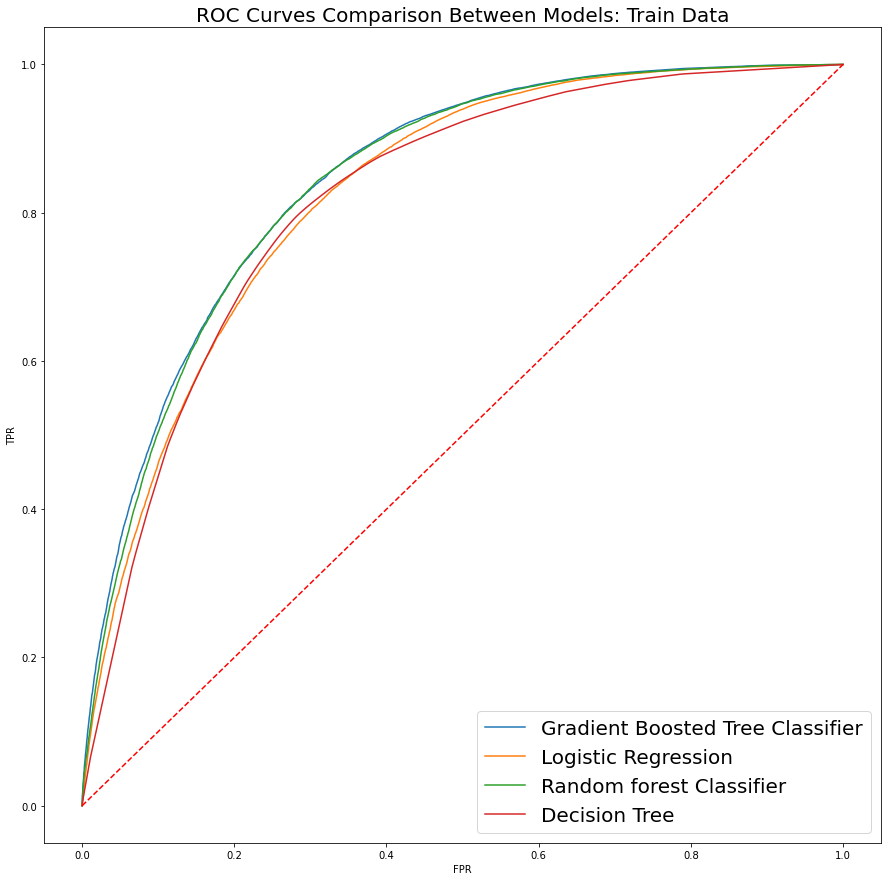

In [51]:
args = [
    [best_gbt_model, best_gbt_predictions_train, 'label', 'Gradient Boosted Tree Classifier', 'tree'],
    [best_lr_model, best_lr_preds_train, 'label', 'Logistic Regression', 'lr'],
    [best_rf_model, best_rf_predictions_train, 'label', 'Random forest Classifier', 'tree'],
    [best_dtree_model, best_dtree_predictions_train, 'label', 'Decision Tree', 'tree']
]
plot_roc(args, title=f'ROC Curves Comparison Between Models: Train Data')

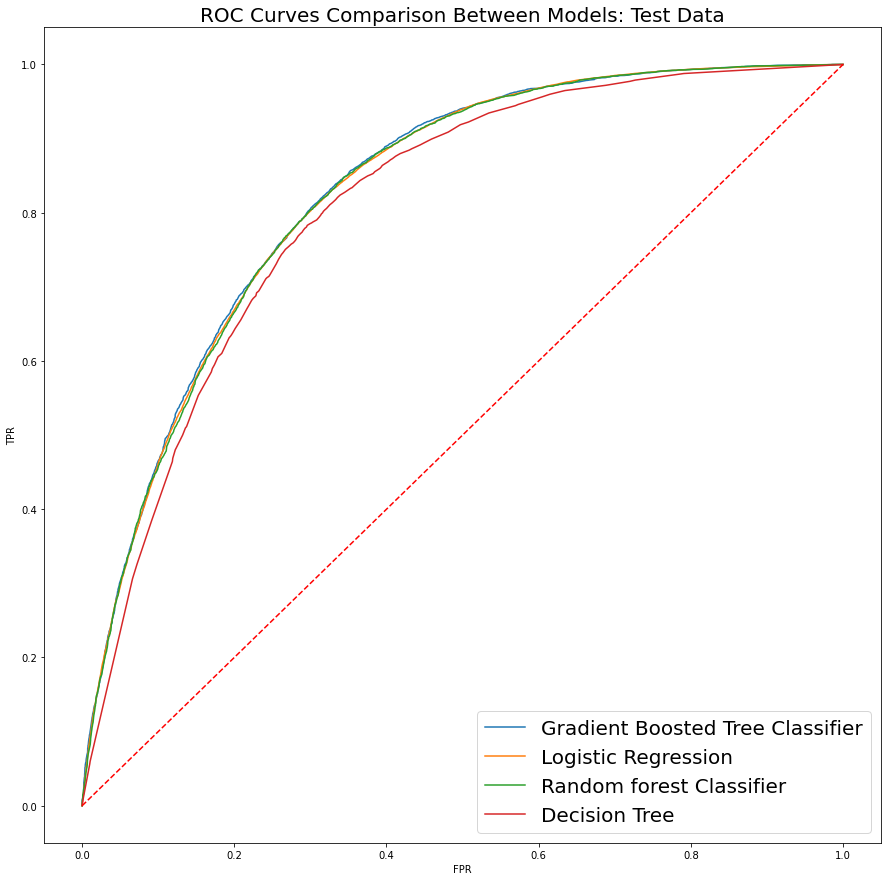

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 38332)
Traceback (most recent call last):
  File "/usr/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.8/socketserver.py", line 747, in __init__
    self.handle()
  File "/usr/local/lib/python3.8/dist-packages/pyspark/accumulators.py", line 262, in handle
    poll(accum_updates)
  File "/usr/local/lib/python3.8/dist-packages/pyspark/accumulators.py", line 235, in poll
    if func():
  File "/usr/local/lib/python3.8/dist-packages/pyspark/accumulators.py", line 239, in accum_updates
    num_updates = read_int(self.rfile)
  File "/usr/lo

In [52]:
args = [
    [best_gbt_model, best_gbt_predictions_test, 'label', 'Gradient Boosted Tree Classifier', 'tree'],
    [best_lr_model, best_lr_preds_test, 'label', 'Logistic Regression', 'lr'],
    [best_rf_model, best_rf_predictions_test, 'label', 'Random forest Classifier', 'tree'],
    [best_dtree_model, best_dtree_predictions_test, 'label', 'Decision Tree', 'tree']
]
plot_roc(args, title=f'ROC Curves Comparison Between Models: Test Data')

## 6. Conclusion <a class="anchor" id="conclusion"></a>
Challenges & solutions  
Insights gained  
Future work  
Limitations

## 7. Tear Down: <a class="anchor" id="stop"></a>

In [ ]:
# spark.stop()